In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import joblib


from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import pandas as pd

In [3]:
tr_features=pd.read_csv('train_features.csv')
tr_labels=pd.read_csv('train_labels.csv')

te_features=pd.read_csv('test_features.csv')
te_labels=pd.read_csv('test_labels.csv')



In [4]:
def print_results(results):
    print('Best PARAMS: {}\n'.format(results.best_params_))
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}' .format(round(mean,3), round(std*2,3), params))


In [5]:
Tree=DecisionTreeClassifier(criterion="gini", max_depth=3)    #or criterion="entropy"

In [6]:
Tree.fit(tr_features, tr_labels.values.ravel()) #column vactor to array

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
pred_te = Tree.predict(te_features)

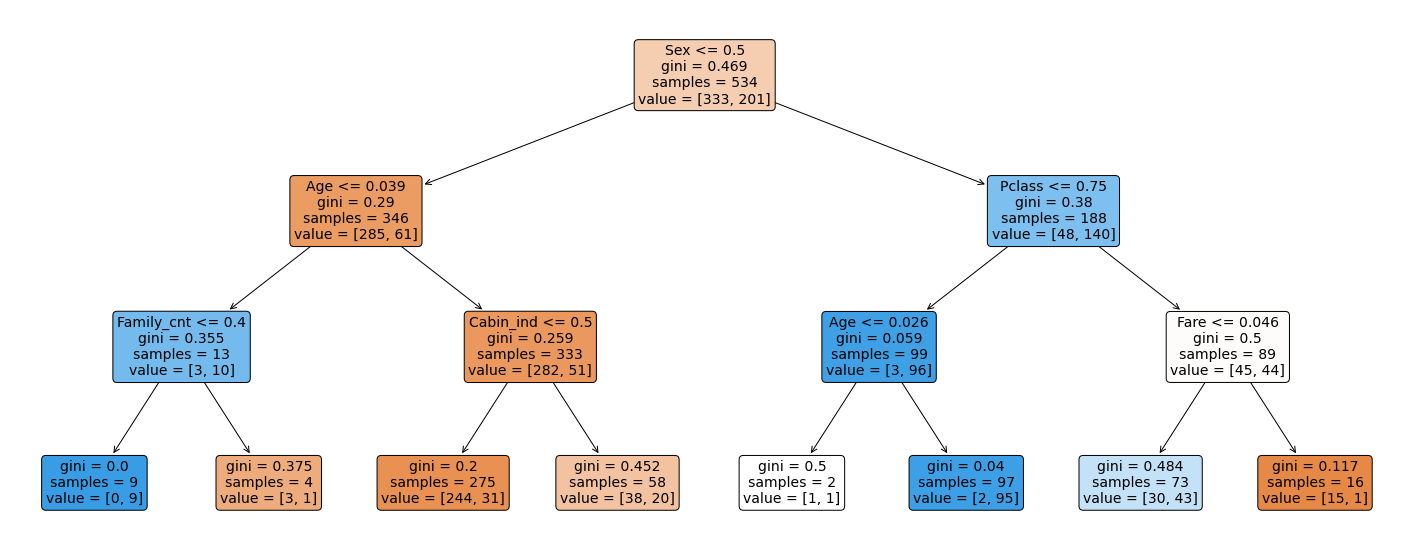

In [8]:
plt.figure(figsize=(25,10))
columnfeatures=list(te_features.columns)
graph=tree.plot_tree(Tree,filled=True,rounded=True,fontsize=14, feature_names=columnfeatures)
plt.show()

In [11]:
joblib.dump(Tree, 'DT_model.pkl')


['DT_model.pkl']